## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 7 csv files in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ships.csv
/kaggle/input/cores.csv
/kaggle/input/rockets.csv
/kaggle/input/capsules.csv
/kaggle/input/payloads.csv
/kaggle/input/launches.csv
/kaggle/input/launchpads.csv


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/capsules.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# capsules.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/capsules.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'capsules.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 19 rows and 6 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,capsule_id,serial,status,reuse_count,water_landings,land_landings
0,5e9e2c5bf35918ed873b2664,C101,retired,1,1,0
1,5e9e2c5bf3591882af3b2665,C102,retired,1,1,0
2,5e9e2c5bf3591835983b2666,C103,unknown,1,1,0
3,5e9e2c5bf359189ef23b2667,C104,unknown,1,1,0
4,5e9e2c5bf3591859a63b2668,C105,unknown,1,1,0


Distribution graphs (histogram/bar graph) of sampled columns:

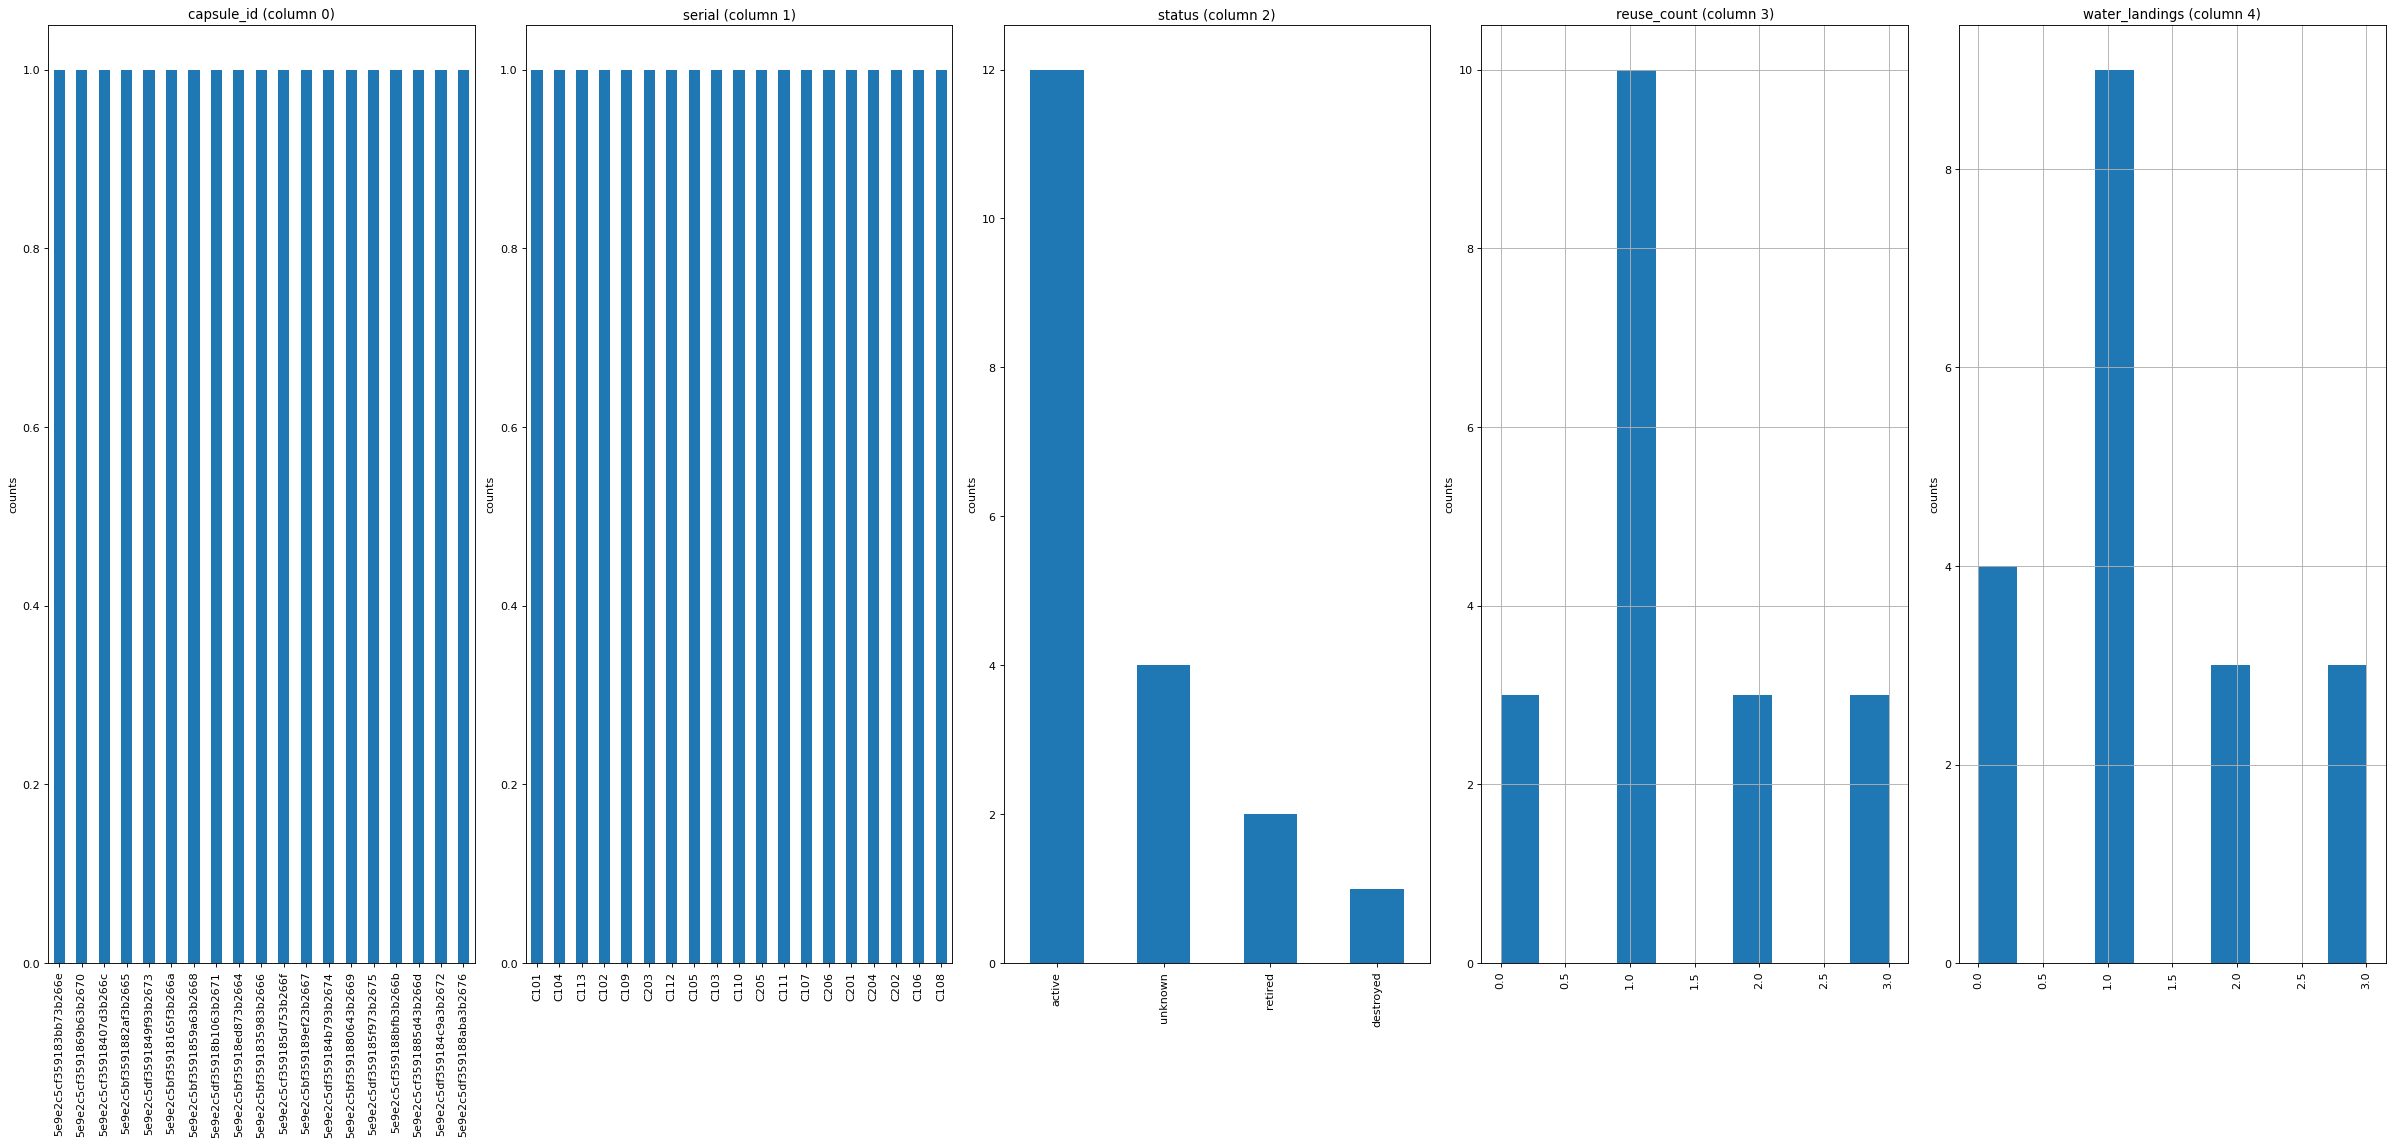

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

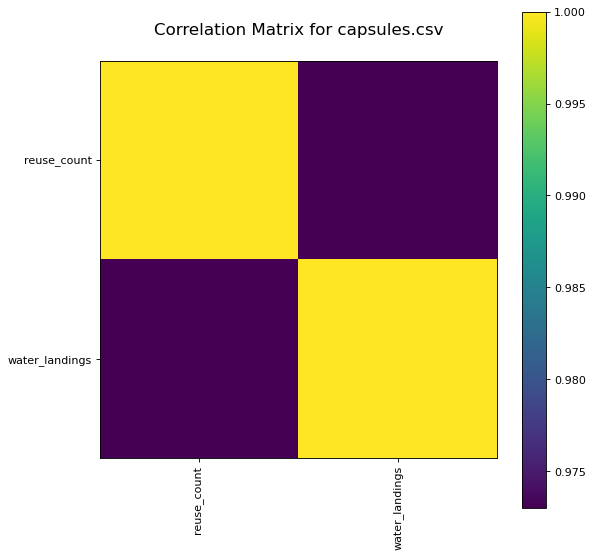

In [9]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

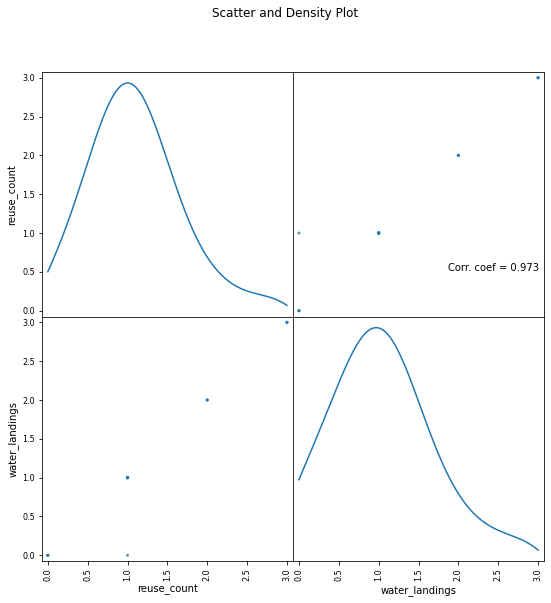

In [10]:
plotScatterMatrix(df1, 9, 10)

### Let's check 2nd file: /kaggle/input/cores.csv

In [11]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# cores.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/kaggle/input/cores.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'cores.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 65 rows and 9 columns


Let's take a quick look at what the data looks like:

In [12]:
df2.head(5)

,core_id,serial,status,reuse_count,block,rtls_attempts,rtls_landings,asds_attempts,asds_landings
0,5e9e289df35918033d3b2623,Merlin1A,lost,0,NaN,0,0,0,0
1,5e9e289ef35918416a3b2624,Merlin2A,lost,0,NaN,0,0,0,0
2,5e9e289ef3591814873b2625,Merlin1C,lost,0,NaN,0,0,0,0
3,5e9e289ef3591855dc3b2626,Merlin2C,lost,0,NaN,0,0,0,0
4,5e9e289ef359184f103b2627,Merlin3C,lost,0,NaN,0,0,0,0


Distribution graphs (histogram/bar graph) of sampled columns:

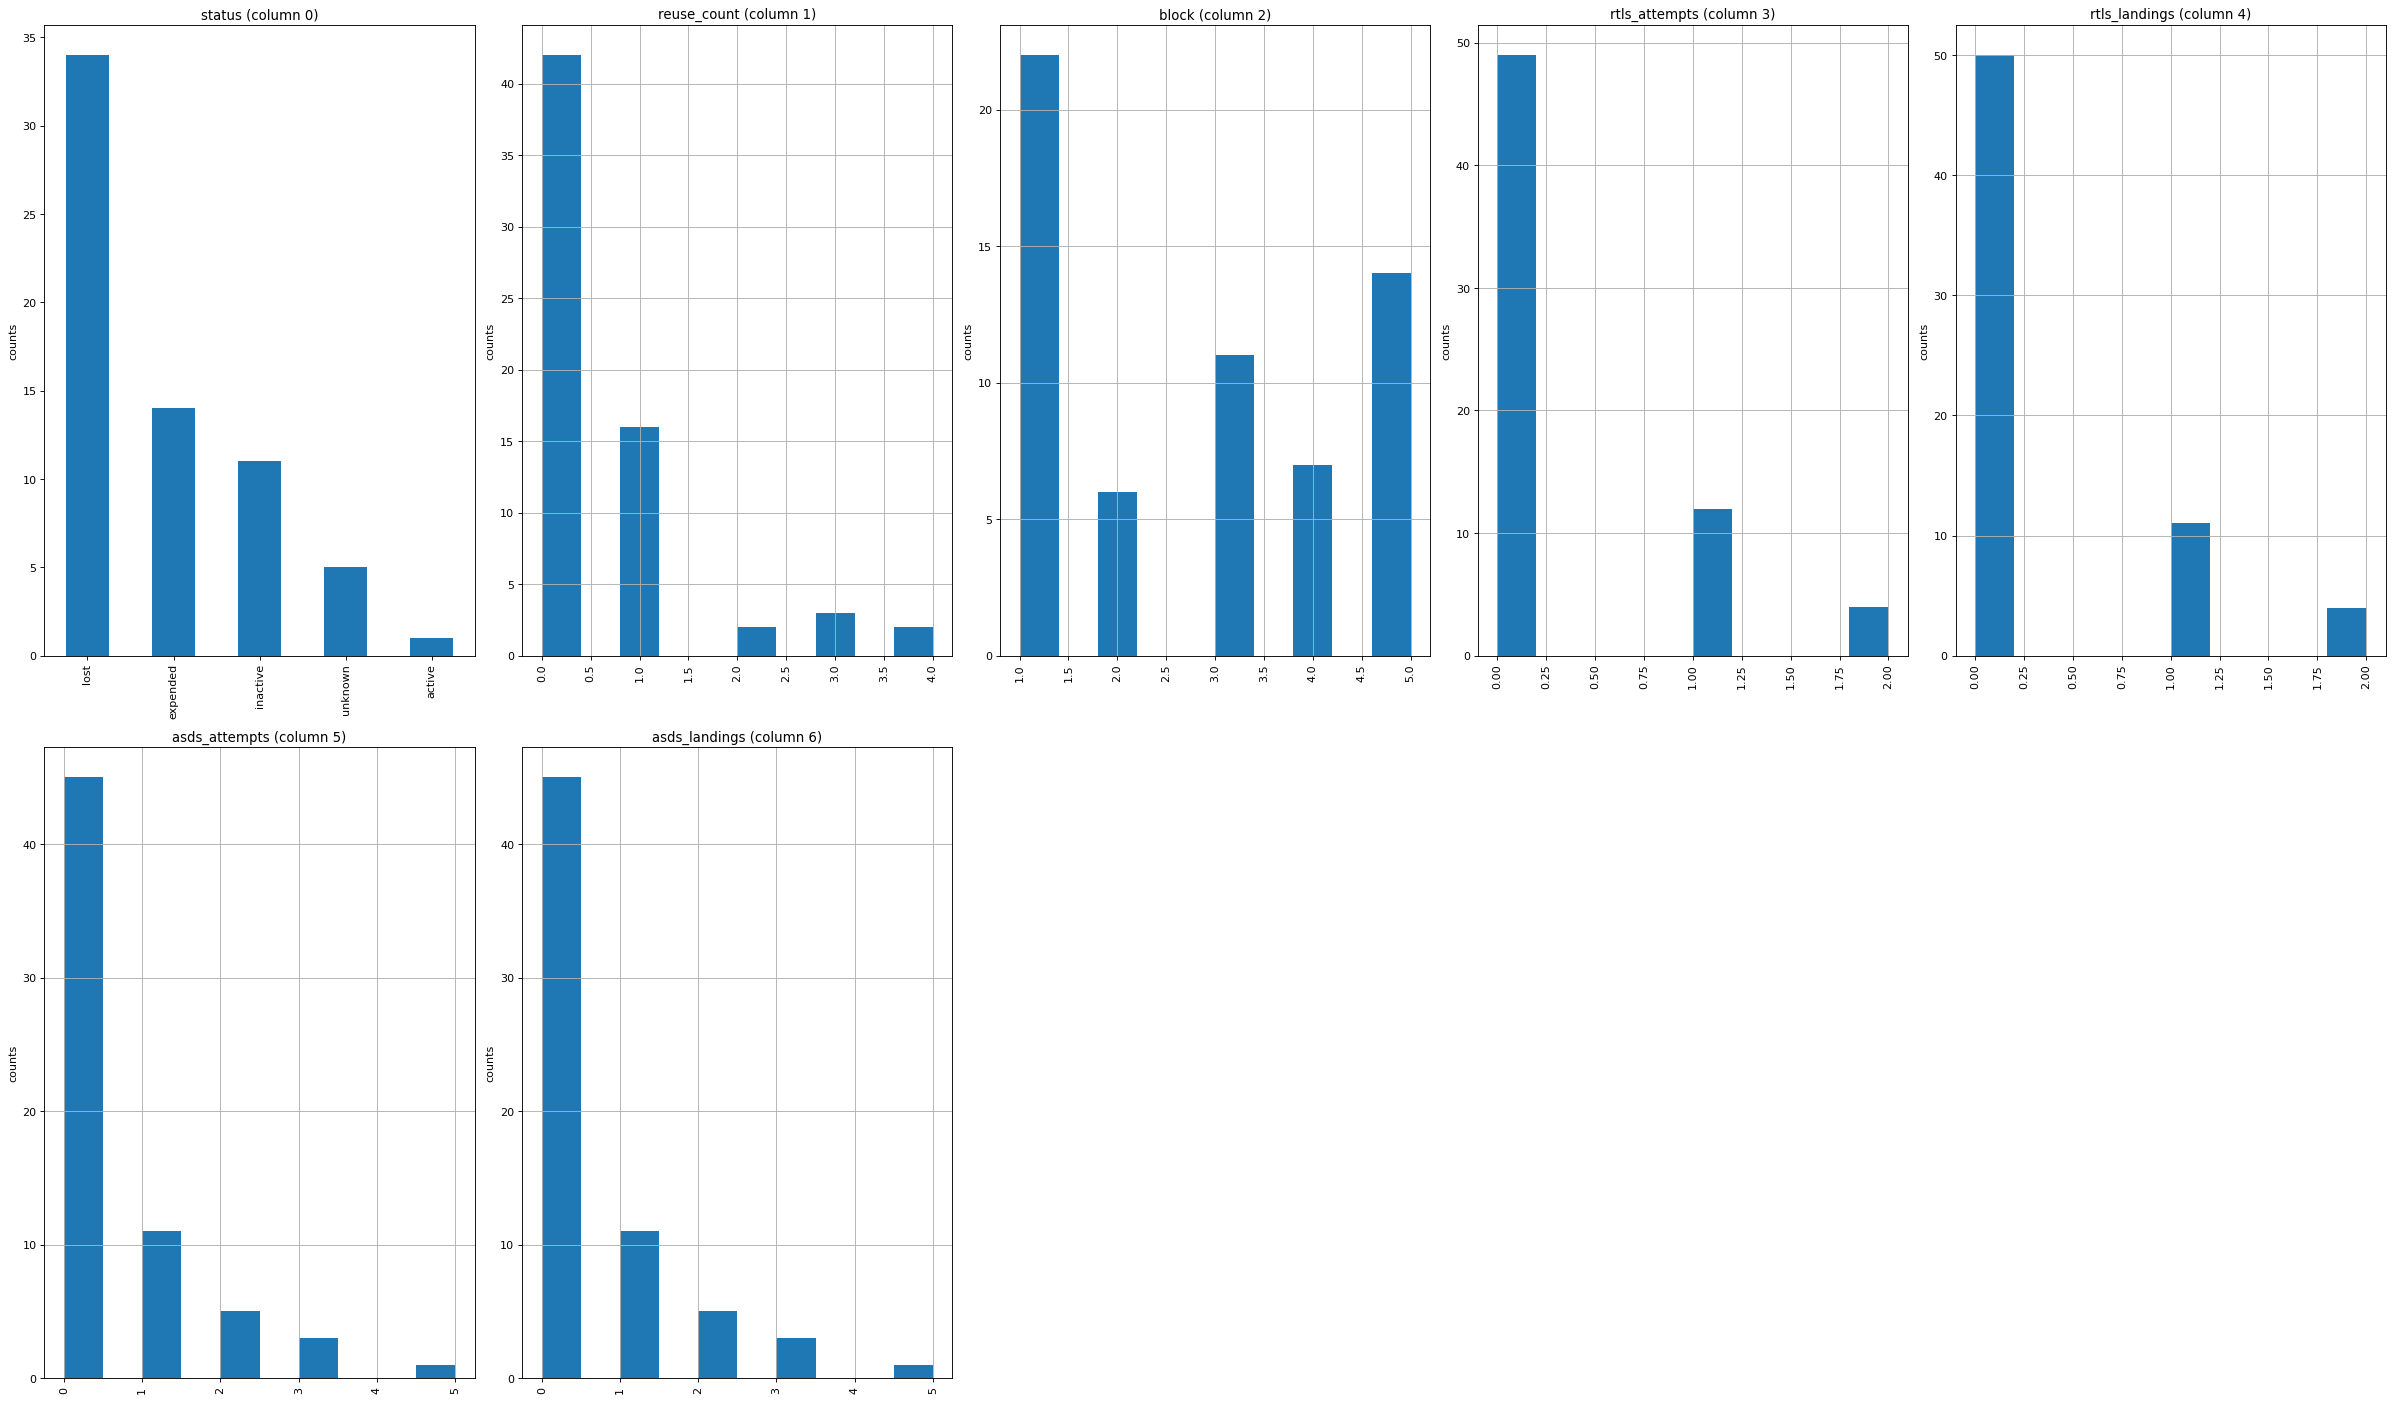

In [13]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

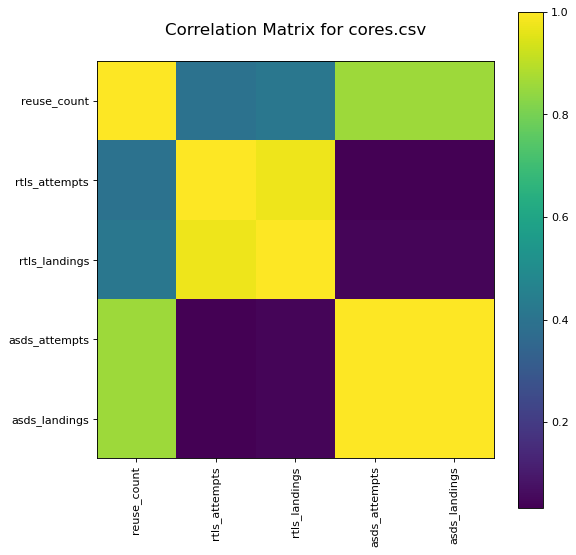

In [14]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

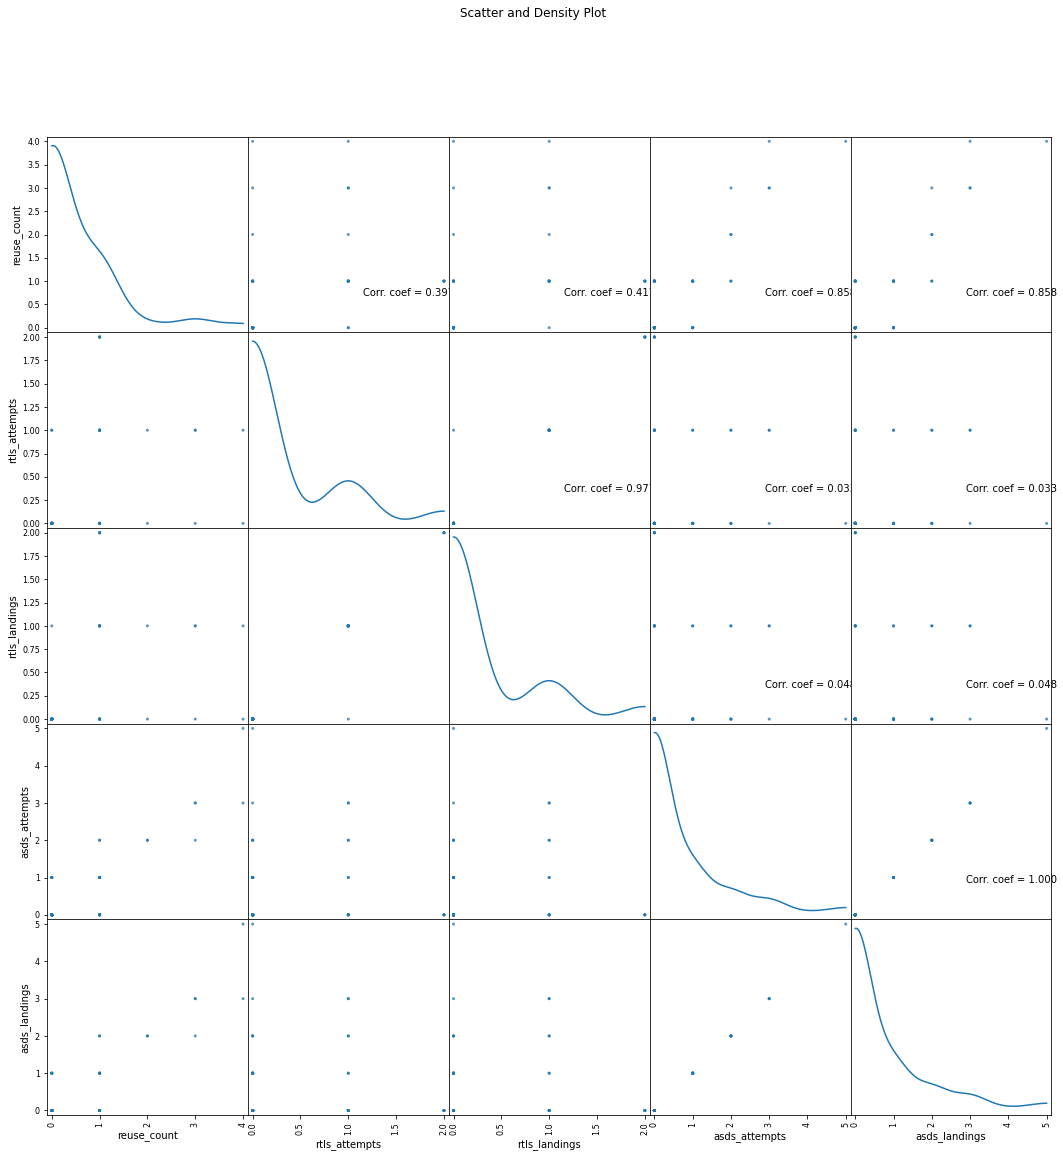

In [15]:
plotScatterMatrix(df2, 18, 10)

### Let's check 3rd file: /kaggle/input/launches.csv

In [16]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# launches.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/kaggle/input/launches.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'launches.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 96 rows and 14 columns


Let's take a quick look at what the data looks like:

In [17]:
df3.head(5)

,launch_id,name,date,rocket_id,launchpad_id,success,failures,ships,capsules,payloads,cores,fairings_reused,fairings_recovery_attempts,fairings_recovered
0,5eb87cd9ffd86e000604b32a,FalconSat,2006-03-24T22:30:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,['merlin engine failure'],[],[],['5eb0e4b5b6c3bb0006eeb1e1'],"[{'core': '5e9e289df35918033d3b2623', 'flight'...",False,False,False
1,5eb87cdaffd86e000604b32b,DemoSat,2007-03-21T01:10:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,['harmonic oscillation leading to premature en...,[],[],['5eb0e4b6b6c3bb0006eeb1e2'],"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",False,False,False
2,5eb87cdbffd86e000604b32c,Trailblazer,2008-08-02T03:34:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,['residual stage-1 thrust led to collision bet...,[],[],"['5eb0e4b6b6c3bb0006eeb1e3', '5eb0e4b6b6c3bb00...","[{'core': '5e9e289ef3591814873b2625', 'flight'...",False,False,False
3,5eb87cdbffd86e000604b32d,RatSat,2008-09-28T23:15:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,True,[],[],[],['5eb0e4b7b6c3bb0006eeb1e5'],"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",False,False,False
4,5eb87cdcffd86e000604b32e,RazakSat,2009-07-13T03:35:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,True,[],[],[],['5eb0e4b7b6c3bb0006eeb1e6'],"[{'core': '5e9e289ef359184f103b2627', 'flight'...",False,False,False


Distribution graphs (histogram/bar graph) of sampled columns:

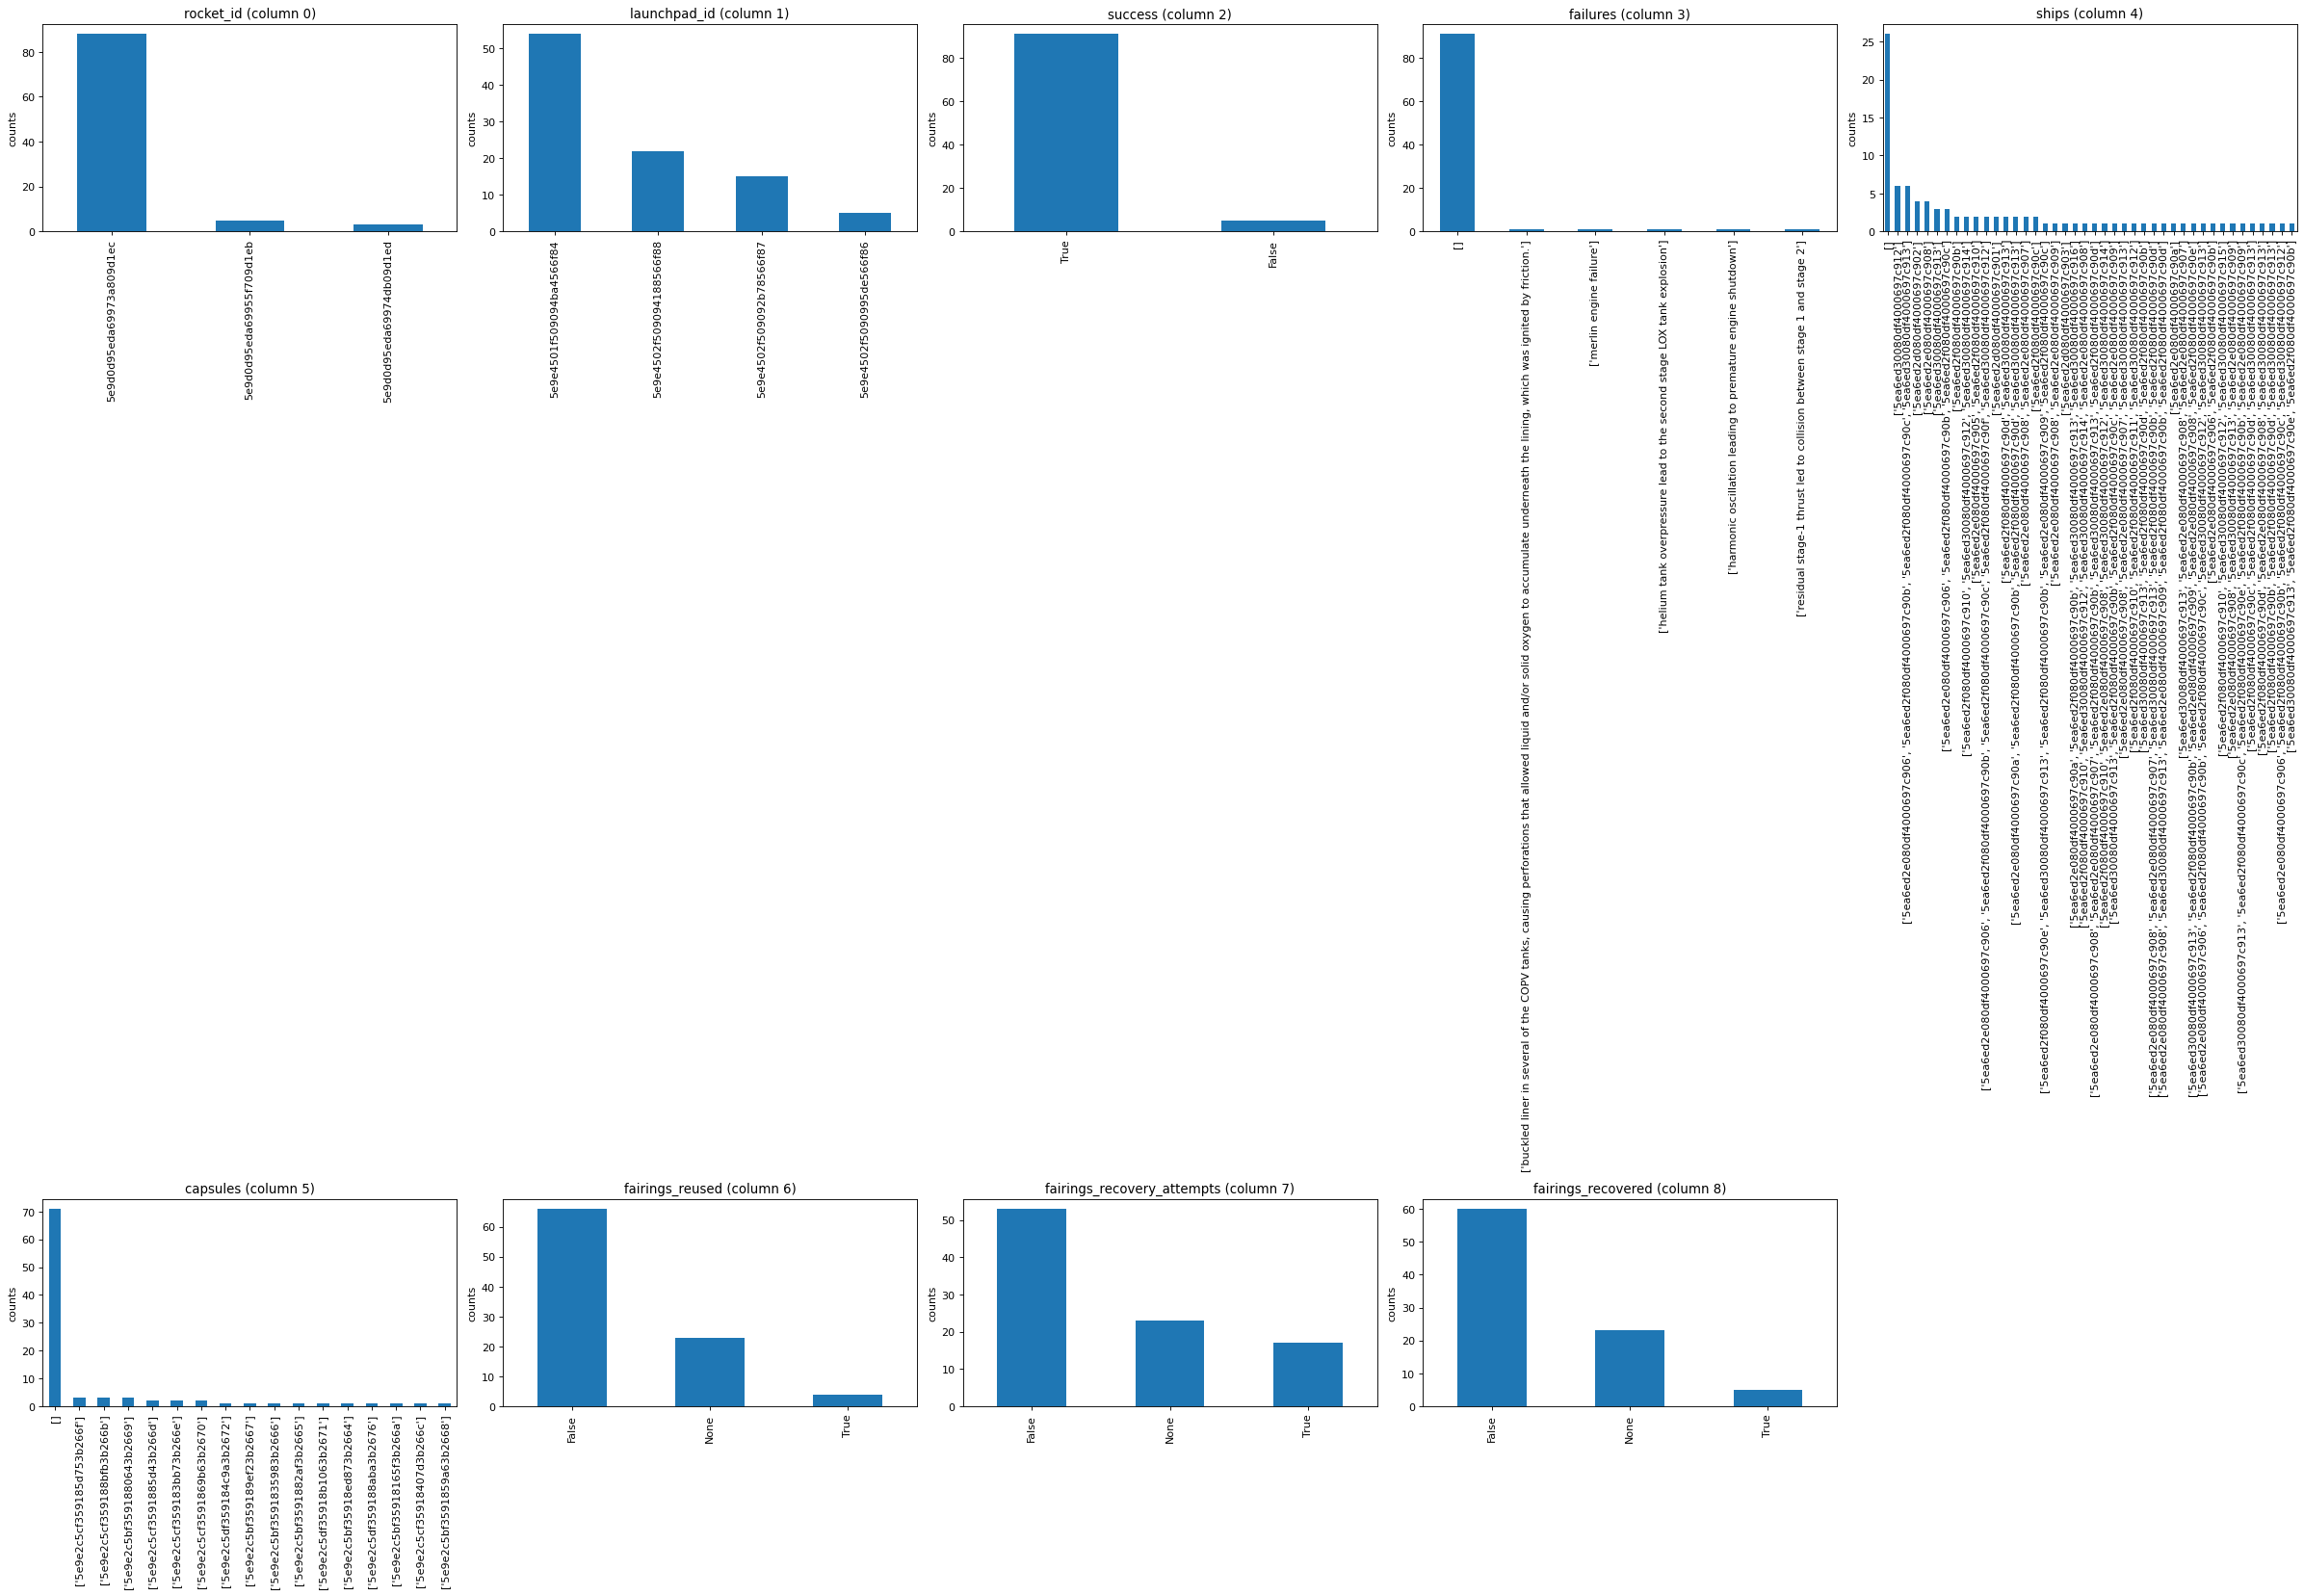

In [18]:
plotPerColumnDistribution(df3, 10, 5)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!